**Lista 4** - Algorytmy i Struktury Danych 2021, PWr - W13

*Autor:* Mateusz Machaj, 262288

*Data:* 02.12.2021 r.

In [1]:
import time
import matplotlib.pyplot as plt
import random
import math
from typing import Any
from typing import Union
from __future__ import annotations


# Zadanie 1

Zaimplementowane zostały w sposób przedstawiony na wykładzie i ulepszony w obsługę błędów dwie kolejki. Są one takie, że:

### a) koniec kolejki znajduje się na końcu listy

In [2]:
class QueueEnd:
    """Queue implemented basing on the python list.
    The end of the queue is on the end of the list.
    """

    def __init__(self):
        """Create a queue.
        """
        self.items = []

    def isEmpty(self) -> bool:
        """Check if the queue contains any elements.

        Returns:
            bool: Information about emptiness.
        """
        return self.items == []

    def enqueue(self, item: Any):
        """Add an item on the end of the queue.

        Args:
            item (Any): Te item to be added.
        """
        self.items.append(item)

    def dequeue(self) -> Any:
        """Remove the first item from the queue.

        Raises:
            IndexError: Items cannot be removed from the empty queue.

        Returns:
            Any: The removed first item.
        """
        if self.isEmpty():
            raise IndexError("Queue is already empty.")
        return self.items.pop(0)

    def size(self) -> int:
        """Measure the length of the queue.

        Returns:
            int: Length of the queue.
        """
        return len(self.items)


### b) koniec kolejki znajduje się na początku listy

In [46]:
class QueueStart:
    """Queue implemented basing on the python list.
    The end of the queue is on the begining of the list.
    """

    def __init__(self):
        """Create a queue.
        """
        self.items = []

    def isEmpty(self) -> bool:
        """Check if the queue contains any elements.

        Returns:
            bool: Information about emptiness.
        """
        return self.items == []

    def enqueue(self, item: Any):
        """Add an item on the end of the queue.

        Args:
            item (Any): Te item to be added.
        """
        self.items.insert(0, item)

    def dequeue(self) -> Any:
        """Remove the first item from the queue.

        Raises:
            IndexError: Items cannot be removed from the empty queue.

        Returns:
            Any: The removed first item.
        """
        if self.isEmpty():
            raise IndexError("Queue is already empty.")
        return self.items.pop()

    def size(self) -> int:
        """Measure the length of the queue.

        Returns:
            int: Length of the queue.
        """
        return len(self.items)


# Zadanie 2

Obie implementacje różnią się jedynie dwoma metodami: `enqueue` oraz `dequeue`.

Porównam działanie tych dwóch metod przez pomiar czasu dla wieloktrotnych powtórzeń.

* Zaczynam od konstrukcji funkcji mierzących czas $n$-krotnego powtórzenia dla zadanych metod:

In [47]:
def time_check_enq(obj: Union[QueueStart, QueueEnd], repet: int) -> float:
    """Measure the time of `n` `enqueue` method calls.

    Args:
        obj (Union[QueueStart, QueueEnd]): Queue class.
        repet (int): Times to repeat.

    Returns:
        float: Time of the operation.
    """
    time_a = time.time()
    for i in range(0, repet):
        obj.enqueue(i)
    time_b = time.time()
    time_diff = time_b - time_a
    return time_diff


def time_check_deq(obj: Union[QueueStart, QueueEnd], repet: int) -> float:
    """Measure the time of `n` `dequeue` method calls.

    Args:
        obj (Union[QueueStart, QueueEnd]): Queue class.
        repet (int): Times to repeat.

    Returns:
        float: Time of the operation.
    """
    time_a = time.time()
    for _ in range(0, repet):
        obj.dequeue()
    time_b = time.time()
    time_diff = time_b - time_a
    return time_diff


* Tworzę następnie instancje obu klas i wybieram racjonalne ilości powtórzeń w iteratorze `range`.
* Listy `enq_a`, `deq_a`, `enq_b`, `deq_b` mierzą czasy dla odpowiednich metod i klas oraz zapisują te czasy dla różnych ilości powtórzeń.
* Dla każdej ilości powtórzeń wykonuję w pętli pomiary czasu za pomocą skonstruowanych funkcji.
* Wizualizuję zebrane dane.

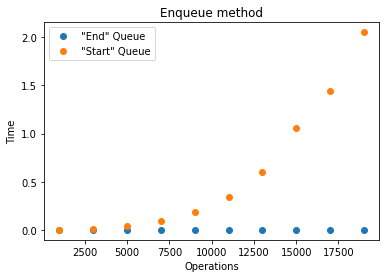

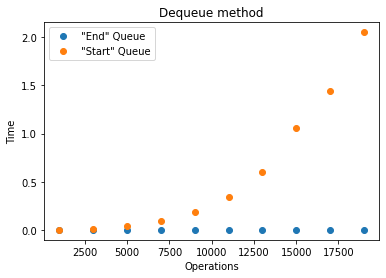

In [48]:
a = QueueEnd()
b = QueueStart()
rng = range(1000, 20000, 2000)

enq_a = []
deq_a = []
enq_b = []
deq_b = []

for N in rng:
    enq_a.append(time_check_enq(a, N))
    enq_b.append(time_check_enq(b, N))
    deq_a.append(time_check_enq(a, N))
    deq_b.append(time_check_enq(b, N))

plt.plot(rng, enq_a, 'o')
plt.plot(rng, enq_b, 'o')
plt.xlabel("Operations")
plt.ylabel("Time")
plt.title("Enqueue method")
plt.gca().legend(('"End" Queue', '"Start" Queue'))
plt.show()

plt.plot(rng, enq_a, 'o')
plt.plot(rng, enq_b, 'o')
plt.xlabel("Operations")
plt.ylabel("Time")
plt.title("Dequeue method")
plt.gca().legend(('"End" Queue', '"Start" Queue'))
plt.show()


Wyraźnie widać, że dla obu metod kolejka `QueueStart` osiąga znacznie gorsze wyniki.
Zatem w przypadku wyboru z takich dwóch implemetacji **korzystać jest lepiej z kolejki o końcu na końcu listy**.

# Zadanie 3

### Opis problemu i hipoteza:

Zasymuluję sytuację z supermarketu gdzie mamy $k$ kas i każdej godziny przychodzi średnio $n$ klientów. Wiemy też, że czas obsługi będzie mieścił się w przedziale $I = [a,b]$. Założymy, iż ilość kupowanych przez nich produktów (czas obsługi) jest rozdystrybuowany według rozkladu normalnego.

Chcemy dowiedzieć się, **czy lepiej, aby klienci podchodzili do kas w osobnych kolejkach, czy może szybciej zostaną obsłużeni, jeśli będzie tylko jedna kolejka**.

(Jeżeli okaże się, że klienci zbyt bardzo/zbyt mało się gromadzą z powodu małej wydajności, po godzinie liczba aktywnych kas się zmieni, rozpatrujemy jednak przypadek jednaj godziny, co jest generalnie sensowne dla postawionego problemu.)

### Przyjmowane wartości:

* Liczba kas: $k=6$.

* Liczba klientów na godzinę: $n=40$.

* Czas obsługi: _od 1 do 10 minut_ $I=[a, b]=[60, 600]$ (czas liczymy w sekundach).

### Opis modelu i szkic rozwiązania:

<u>_Wariant **A**:_</u>
* Każdy przychodzący klient trafia wspólnej do kolejki.
* Gdy jakaś kasa się zwalnia, zostaje do niej przydzielony pierwszy czekający klient.

<u>_Wariant **B**:_</u>
* Każdy przychodzący klient wybiera kolejke do tej kasy, która jest najbardziej atrakcyjna.
* Decyzja odbywa się na zasadzie wyboru kasy o największym **współczynniku atrakcyjności** $\zeta$:

$$\zeta = \frac{1}{1+\sum_{i=1}^m{q_i}},$$

dla $m$ będącym liczbą klientów w kolejce przy danej kasie, gdzie $q_i$ to ogólny wskaźnik ilości zakupów dla $i$-tego klienta i jest on przydzielany dla uproszczenia kategoriami - $q_i \in \{1, 2, 3, 4\}$ (jeżeli klient istnieje). Ten przydział odbywa się na zasadzie porówniania do całkowitego przedziału czasu $I = [a,b]$, tak że mając czas obsługi $i$-tego klienta $\tau$ (oceniony z góry na podstawie jego ilości zakupów), bierzemy 

$$q_i = \lceil\frac{4(\tau-a)}{b-a}\rceil.$$

Oczywiście musimy mieć $\tau \in I$, ale to już narzucone.

Dlatego $\zeta = 1$ dla braku klientów i maleje im więcej ich jest oraz im więcej mają zakupów, ale oczywiście $\zeta>0$.

<u>_Ogólne działania wspólne w obu wariantach:_</u>
* Każdemu klientowi w momencie inicjalizacji zostaje przydzielony czas według rozkładu normalnego (ogon obcinamy dla uproszczenia, ale nie jest istotny). Parametry rozkładu normalnego dla czasu obsługi to zatem: $\mu=\frac{a+b}{2},\, \sigma=\frac{b-\mu}{3}$ (aby wpasować najbardziej prawdopodobne wartości do przedziału $I$).
* Symulujemy upływające sekundy zwiększając wartość licznika czasu po każdym prześciu pętli zdarzeń.
* W każdej sekundzie losujemy liczbę $r,\, r\in \{1, 2, \ldots, p\}$ z rozkładu normalnego, tak że $p = \frac{3600}{n}$ i inicjalizujemy klienta wtedy gdy $r=p$. Łatwo zauważyć, że wtedy mamy zachowaną liczbę średnio $n$ klientów na godzinę ale dodajemy pewnej losowości.
* Jeśli klient zostanie obsłużony, usuwamy go z układu i obsługiwany jest kolejny w kolejce.
* Sprawdzam dla obu wariantów, ile każdy wychodzący klient musiał czekać aż do obsłużenia i porównuję sumy tych czasów.

### Implementacja:

Na początku piszę funkcje pomocnicze związane z losowością, działające tak jak opisano powyżej.

In [49]:
def new_customer_emerg(customers_per_h: float) -> bool:
    """Evaluate if new customer should emerge.
    Use a method uniform random choice from a set of natural numbers.

    Args:
        customers_per_h (float): People that come per hour (by average).

    Returns:
        bool: Information if new client appears.
    """
    p = 3600 // customers_per_h
    draw = random.randint(1, p)
    if draw == p:
        return True
    return False


def rand_serv_time(min_serv_time: float, max_serv_time: float) -> float:
    """Give the random time reqired for service.
    Use a normal distribution fitted for the given conditions.
    -3sigma to 3 sigma is only respected.

    Args:
        min_serv_time (float): Minimal time to wait in checkout.
        max_serv_time (float): Maximal time to wait in checkout.

    Returns:
        float: Expected time reqired for service.
    """
    mu = (min_serv_time + max_serv_time) / 2
    sigma = (max_serv_time - mu) / 3
    draw = random.normalvariate(mu, sigma)
    draw = max(min_serv_time, draw)
    draw = min(max_serv_time, draw)
    return draw

Zegar jest klasą liczącą sekundy i pomagającą w ocenie czasu oczekiwania klientów.

In [50]:
class Clock:
    """Time counting class.
    """
    def __init__(self):
        """Create a clock.
        """
        self.time = 0

    def tick(self):
        """Increment the time.
        """
        self.time += 1

Klienci mają cechują się ilością zakupów (szacowanym czasem obsługi + kategorią $q_i$) oraz czasem dołączenia do kolejki.

In [51]:
class Customer:
    """Customer representation.
    """
    def __init__(self, time: int, min_serv_time: float, max_serv_time: float):
        """Create a customer with given features.

        Args:
            time (int): Current time from clock.
            min_serv_time (float): Minimal time to wait in checkout.
            max_serv_time (float): Maximal time to wait in checkout.
        """
        self.timestamp = time
        self.serv_time = rand_serv_time(min_serv_time, max_serv_time)
        interval = max_serv_time - min_serv_time
        self.category = math.ceil(4 * (self.serv_time - min_serv_time) / interval)

Bramki przed kasami umożliwają na zebranie od klienta danych na temat jego czasu oczekiwania w kolejce. System jest uruchamiany przy kasie, za każdym razem, gdy przychodzi nowy klient.

In [52]:
class Gates:
    """Gates collecting customers waiting time.
    """
    def __init__(self, clock: Clock):
        """Create the gates with a times regiter.

        Args:
            clock (Clock): Clock object to read the time from.
        """
        self.clock = clock
        self.waiting_times = []

    def coll_feedback(self, customer_timestamp: int):
        """Collect customers waiting time to the register.

        Args:
            customer_timestamp (int): Time when a customer joined his queue.
        """
        waiting_time = self.clock.time - customer_timestamp
        self.waiting_times.append(waiting_time)

Każda kasa jest traktowana jako osobny obiekt i może wykonywać różne akcje. Pozwala dodać do siebie klienta i sama odlicza czas do jego obsłużenia, potem przekierowuje do wyjścia. Umożliwia też na sprawdzenie czy jest aktualnie zajęta, kto jest klientem, oraz jakiej jest on kategorii.

In [53]:
class Checkout:
    """Single checkout.
    """

    def __init__(self, gates: Gates):
        """Create a checkout with no customers.

        Args:
            gates (Gates): Gate object, collecting the waiting time of customers.
        """
        self.gates = gates
        self.curr_customer = None
        self.remaining_time = 0
        self.available = True

    def add_customer(self, customer: Customer):
        """Assign a customer to the checkout.
        Also, collect his data using gates and turn on the 'timer' indicating his service time.

        Args:
            customer (Customer): Given customer to assign.
        """
        self.available = False
        self.curr_customer = customer
        self.remaining_time = self.curr_customer.serv_time
        self.gates.coll_feedback(self.curr_customer.timestamp)

    def customer_cat(self) -> int:
        """Check current customers category.

        Returns:
            int: Customers category or 0 if there is no customer.
        """
        if self.curr_customer != None:
            return self.curr_customer.category
        else:
            return 0

    def tick(self):
        """Change the time counter state and if just finished the work, reset the availibility paramreters.
        """
        if self.curr_customer != None:
            if self.remaining_time > 0:
                self.remaining_time -= 1
            else:
                self.available = True
                self.curr_customer = None


Dla większej ilości kas tworzę układ bramek oraz poszczególnych kas dla łatwiejszej obsługi całości na raz. Klasa pozwala też na przetworzenie końcowych danych z bramek.

In [54]:
class ShopCheckouts:
    """System of all checkouts and gates to operate on them easily.
    """
    def __init__(self, checkouts_n: int, clock: Clock):
        """Create a system of checkouts and gates.

        Args:
            checkouts_n (int): Number of checkouts.
            clock (Clock): Clock object to count the time.
        """
        self.gates = Gates(clock)
        self.checkouts_list = [Checkout(self.gates) for _ in range(checkouts_n)]

    def avail_checkouts(self) -> list:
        """Chceck the availability of all checkouts.

        Returns:
            list: List of `Bool` values indicating availability.
        """
        return [checkout.available for checkout in self.checkouts_list]

    def customer_cat_vals(self) -> list:
        """Chceck categories of customers currently serviced.

        Returns:
            list: List of categories for each checkout.
        """
        return [checkout.customer_cat() for checkout in self.checkouts_list]

    def tick(self):
        """Change the time counter states for each checkout. Then they do succeeding actions on their own.
        """
        for checkout in self.checkouts_list:
            checkout.tick()

    def total_waiting_time(self) -> int:
        """Evaluate a total waiting time basing on gates register.

        Returns:
            int: Total waiting time for data in the register.
        """
        return sum(self.gates.waiting_times)

Na koniec funkcje obsługujące symulacje poszczególnych modeli. Działają według schematów opisanych w szkicu.

In [55]:
def simulation_A(
    customers_per_h: float,
    checkouts_n: int,
    min_serv_time: float,
    max_serv_time: float,
    hours: int = 1,
) -> int:
    """Simulate the A variant, where all the customers wait in one line.

    Args:
        customers_per_h (float): People that come per hour (by average).
        checkouts_n (int): Number of checkouts.
        min_serv_time (float): Minimal time to wait in checkout.
        max_serv_time (float): Maximal time to wait in checkout.
        hours (int, optional): Hours of simulation. Defaults to 1.

    Returns:
        int: Total waiting time for given conditions.
    """
    
    clock = Clock()
    checkouts = ShopCheckouts(checkouts_n, clock)
    common_queue = QueueEnd()

    for _ in range(0, 3600 * hours):
        if new_customer_emerg(customers_per_h):
            customer = Customer(clock.time, min_serv_time, max_serv_time)
            common_queue.enqueue(customer)

        avail_checkouts = checkouts.avail_checkouts()
        if not common_queue.isEmpty() and any(avail_checkouts):
            checkout_index = avail_checkouts.index(True)
            customer = common_queue.dequeue()
            checkouts.checkouts_list[checkout_index].add_customer(customer)

        clock.tick()
        checkouts.tick()

    return checkouts.total_waiting_time()

In [56]:
def simulation_B(
    customers_per_h: float,
    checkouts_n: int,
    min_serv_time: float,
    max_serv_time: float,
    hours: int = 1,
) -> int:
    """Simulate the B variant, where there is a separate queue to each checkout.
    Moreover, customers rationally choose the queues.

    Args:
        customers_per_h (float): People that come per hour (by average).
        checkouts_n (int): Number of checkouts.
        min_serv_time (float): Minimal time to wait in checkout.
        max_serv_time (float): Maximal time to wait in checkout.
        hours (int, optional): Hours of simulation. Defaults to 1.

    Returns:
        int: Total waiting time for given conditions.
    """

    clock = Clock()
    checkouts = ShopCheckouts(checkouts_n, clock)
    queues = [QueueEnd() for _ in range(checkouts_n)]
    queues_cat_sum = [0] * checkouts_n

    for _ in range(0, 3600 * hours):
        if new_customer_emerg(customers_per_h):
            checkout_cat_sum = checkouts.customer_cat_vals()
            total_cat_sum = map(sum, zip(queues_cat_sum, checkout_cat_sum))
            queues_attr = [1 / (1 + cat_sum) for cat_sum in total_cat_sum]
            customer = Customer(clock.time, min_serv_time, max_serv_time)
            queue_index = queues_attr.index(max(queues_attr))
            queues[queue_index].enqueue(customer)
            queues_cat_sum[queue_index] += customer.category

        avail_checkouts = checkouts.avail_checkouts()
        for index, queue in enumerate(queues):
            if not queue.isEmpty() and avail_checkouts[index]:
                customer = queue.dequeue()
                checkouts.checkouts_list[index].add_customer(customer)

        clock.tick()
        checkouts.tick()

    return checkouts.total_waiting_time()

### Przygotowanie wyników:

Tworzę funkcje odpowiednio przygotowujące wyniki symulacji, wizualizujące zdobyte dane na wykresie, oraz drukujące dane liczbowe.

In [57]:
def collect_results(attempts: int, simulation: function, input_data: tuple) -> tuple:
    """Conduct a simulation and prepare the results.

    Args:
        attempts (int): Number of tests.
        simulation (funct): Variant of simulation.
        input_data (tuple): Group of four features describing the specific simulation. 
                            (customers per hour, checkouts number, minimal service time, maximal service time)

    Returns:
        tuple: Outcoming data: (numbers of attempts, list of total times for each attempt, average total time).
    """
    rng = range(attempts)
    total_times_list = []
    for _ in rng:
        total_times_list.append(simulation(*input_data))
    mean = sum(total_times_list) / attempts
    return (rng, total_times_list, mean)


In [58]:
def plot_results(resultsA: tuple, resultsB: tuple):
    """Plot the values for each attempt and mark the mean values.
    Do the same for variant A and B, and desctibe the graph.

    Args:
        resultsA (tuple): Results of the simulation A: 
                        (numbers of attempts, list of total times for each attempt, average total time).
        resultsB (tuple): Results of the simulation B: 
                        (numbers of attempts, list of total times for each attempt, average total time).
    """

    rngA, timesA, meanA = resultsA
    rngB, timesB, meanB = resultsB
    colorA = "dodgerblue"
    colorB = "crimson"

    plt.plot(rngA, timesA, "o", color=colorA, alpha=0.25)
    plt.plot(rngB, timesB, "o", color=colorB, alpha=0.25)
    plt.axhline(y=meanA, color=colorA)
    plt.axhline(y=meanB, color=colorB)
    plt.ylabel("Total waiting time")
    plt.xlabel("Attempt number")
    plt.title("Waiting time comparison")
    plt.gca().legend(("A - Common queue", "B - Separate queues"))
    plt.show()

In [59]:
def print_means(resultsA: tuple, resultsB: tuple):
    """Prepare an print the summarization of aquired values:
    average total waiting times and difference between them. 


    Args:
        resultsA (tuple): Results of the simulation A: 
                        (numbers of attempts, list of total times for each attempt, average total time).
        resultsB (tuple): Results of the simulation B: 
                        (numbers of attempts, list of total times for each attempt, average total time).
    """
    rngA, timesA, meanA = resultsA
    rngB, timesB, meanB = resultsB

    diff = meanB - meanA

    print(
        "In case of a COMMON QUEUE (A) average total waiting time is: \n{} s\n".format(
            meanA
        )
    )
    print(
        "In case of a SEPARATE QUEUES (B) average total waiting time is: \n{} s\n".format(
            meanB
        )
    )
    print("Difference between average total waiting times: \n{} s\n".format(diff))

### Wyniki:

Przygotowuję dane tak jak ustalono wcześniej ($n$, $k$ oraz $I = [a, b]$). Podaję też liczbę prób $N$.

In [60]:
customers_per_h = 40
checkouts_n = 6
min_serv_time = 60
max_serv_time = 600

N = 300

In [61]:
data_tuple = (customers_per_h, checkouts_n, min_serv_time, max_serv_time)

Zbieram dane z wynikające z symulacji.

In [62]:
resultsA = collect_results(N, simulation_A, data_tuple)
resultsB = collect_results(N, simulation_B, data_tuple)


Wizualizuję dane na wykresie, pokazując wszystkie wyniki wszystkich prób dla obu wariantów. Niebieski to *wariant A* - wspólna kolejka, a czerwony to *wariant B* - osobne kolejki do każdej kasy.
Pokazuję też, jaka jest średnia wartość ze wszystkich prób dla obu przypadków.

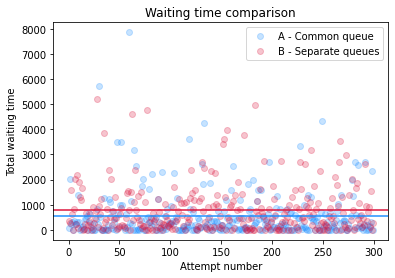

In [63]:
plot_results(resultsA, resultsB)

Podaję ostatecznie dodatkowe dane liczbowe pomagające w dokładniejszej analizie wyników.

In [64]:
print_means(resultsA, resultsB)

In case of a COMMON QUEUE (A) average total waiting time is: 
560.7866666666666 s

In case of a SEPARATE QUEUES (B) average total waiting time is: 
801.5966666666667 s

Difference between average total waiting times: 
240.81000000000006 s



### Wnioski:

* Wyraźnie widzimy, że przy rozsądnym doborze liczby klientów oraz kas (tak, żeby nie było sytuacji, że czasy w obu wariantach są równe - co jest w szczególności możliwe), w przypadku wariantu B trzeba czekać sumarycznie dłużej.
* Czasem różnica pomiędzy wynikami w obu wariantach może być niewielka, jednak dla naszego doboru danych i wystarczającej liczby prób (w celu osiągnięcia średnich wyników i ominięcia outlayersów) różnica jest znacząca.

Okazuje się, że **klienci są szybciej obsługiwani, gdy zastosowana jest jedna wspólna kolejka**, nawet jeśli stosunkowo inteligentnie wybierali by kasy w wariancie osobnych kolejek!

### Problemy:

Uproszczenia, które pojawiają się w symulacji to:
* nie wiemy czy rozkład prawdopodobieństwa rzeczywiście jest normalny; uśredniamy niektóre wartości;
* klienci mogą wybrierać kolejki inaczej, niż zakłada to model, choć uwzględniłem __współczynnik atrakcyjności__ trochę niwelujący błędy; ogólnie zależy to od ilości zakupów jakie mają i widzą u innych, a także mogą nie chcieć patrzeć na wiele kas i porównywać;
* kasjerzy mogą mieć różne prędkości obsługiwania - zwykle tak nie jest, ale co np. z praktykantami...;
* czasem kasjerzy odchodzą od kas i liczba $n$ się zmniejsza, co pomijam;
* niektórzy ludzie są _burakami_ i utrudniają kulturalne działanie kolejki;
* nie może przyjść dwóch klientów w tym samym momencie (ale mogą być sekunde po sobie, stąd pomijam kwestię);
* _niekoniecznie może być miejsce lub możliwość na utworzenie osobnych kolejek_ - to już trochę czepianie się.

Oczywiście zawsze znajdzie się jeszcze jakiś szczegół, jakkolwiek najważniejsze problemy zostały wymienione powyżej.

# Zadanie 4

Stworzę program sprawdający poprawność składni dokumentu HTML pod katem brakujacych znaczników zamykajacych.
Nie będzie sprawdana poprawność znaczników jako takich [1], a jedynie poprawność domknięcia nawiasów i znaczników oraz podstawowe zasady.
Mam tutaj na myśli niemożliwość używania pustego znacznika, dopuszczanie spacji i białych znaków jedynie w określonych miejscach. Traktuję też jako błędne zastosowanie atrybutów w znaczniku zamykającym - te mogą się pojawić tylko w otwierającym. 
Znaczniki bez zamknięcia są traktowane oczywiście w odpowiedni dla swojej natury sposób.

[1] Trudno byłoby skompletować tu listę dostępnych możliwości do sprawdzenia, bo przez istnienie atrybutów ciągi znaków w znacznikach oprócz tego, że mogą być niealfanumeryczne, to mają naprawdę dużą dowolność. 

Zupełnie celowo nie uwzględniam struktur typu `<img ... />` jako poprawne - co robiłoby się wycinając "/" bibloiteką `re` - ponieważ w *HTML5* nie są takie struktury stosowane (choć w teorii poprawne). Znaczniki niewymagające zamknięcia będzimy chcieli zapisywać po prostu jako `<img ...>`.

* Do realizacji zadania użyje stosu zaimplementowanego na wykładzie.

In [65]:
class Stack:
    """Standard stack implemented basing on the python list.
    """

    def __init__(self):
        """Create a stack.
        """
        self.items = []

    def isEmpty(self) -> bool:
        """Check if the stack contains any elements.

        Returns:
            bool: Information about emptiness.
        """
        return self.items == []

    def push(self, item: Any):
        """Add an item on the top of the stack.

        Args:
            item (Any): Te item to be added.
        """
        self.items.append(item)

    def pop(self) -> Any:
        """Remove the item from the top of the stack.

        Returns:
            Any: The removed top item.
        """
        return self.items.pop()

    def peek(self) -> Any:
        """Show the item from the top of the stack. 

        Returns:
            Any: The top item.
        """
        return self.items[len(self.items)-1]

    def size(self) -> int:
        """Measure the length of the queue.

        Returns:
            int: Length of the queue.
        """
        return len(self.items)


* W pierwszej części porządkuję dokument i sporządzam listę wnętrz znaczników.
* Jeśli na tym etapie domknięcia nawiasów są niepoprawne, od razu program jest zatrzymywany.

Nie ma na razie sensu angażować stosu w algorytm, bo nawiasy nie mogą być tu zagnieżdżone.

In [66]:
def tag_parser(html_doc: str) -> list:
    """Extract a list of tags from html document and order it (if there are no formal errors).

    Args:
        html_doc (str): HTML5 document.

    Raises:
        Exception: Brackets are expected to be closed properly.

    Returns:
        list: List of tags.
    """
    # przekształcamy wszystkie białe znaki na spacje
    html_doc = ' '.join(html_doc.split())
    correct = True
    index = 0
    tag_counter = -1
    inside = False
    tag_list = []

    while index < len(html_doc) and correct:
        symbol = html_doc[index]
        if symbol == "<":
            if inside:
                correct = False  # bo nie może być kolejnego otwarcia w już otwartym nawiasie
            inside = True
            # tworzymy miejsce na "treść" znacznika w liście
            tag_list.append([])
            tag_counter += 1

        elif symbol == ">":
            if not inside:
                correct = False  # bo nie może być zamknięcia jeśli nie ma wcześniej otwarcia
            inside = False

        if inside and symbol != "<":
            # zapisujemy znaki ze znacznika do listy
            tag_list[tag_counter].append(symbol)

        index += 1

    # jeżeli nie napotkano błędów i domknięte nawiasy
    if correct and not inside:
        # tworzymy listę ciągów znakow reprezentującą wszystkie znaczniki
        tag_list = list(map(''.join, tag_list))
        return tag_list
    else:
        raise Exception("Brackets closed not properly.")


Przechodzę następnie do części gdzie używany jest stos.
* Sprawdazam podstawową poprawność znaczników, tak jak wspomniano w opisie.
* Znajduję właściwą nazwę znacznika (pierwsze słowo) i sprawdzam czy jest on zamykający oraz czy wymaga zamknięcia.
* Używam stosu do realizacji klasycznego algorytmu sprawdzającego zamknięcia.

In [67]:
def tag_list_checker(tag_list: list) -> bool:
    """Analyse the tags using various conditions and tell if they are correctly closed.

    Args:
        tag_list (list): List of prepared tags.

    Returns:
        bool: Information about validity.
    """

    nonclosed_tags = ['link', 'meta', 'BR', 'br', 'img',
                      'hr', '!DOCTYPE']  # znaczniki niewymagające zamknięcia
    stack = Stack()
    correct = True
    index = 0

    while index < len(tag_list) and correct:
        tag = tag_list[index]
        closing = False

        if tag == '':  # pusty znacznik jest niepoprawny
            correct = False
            break
        elif tag[0] == ' ':  # nie może być spacji przed rozpoczęciem właściwej nazwy znacznika
            correct = False
            break

        tag_splt = tag.split()  # znacznik rozbity na słowa (bo może mieć atrybuty)
        tag_f_wrd = tag_splt[0]  # właściwy znacznik

        if tag_f_wrd[0] == "/":  # jeśli rozpoczęty od ukośnika, to jest znacznikiem zamykającyjm
            closing = True
            if len(tag_splt) > 1:  # nie może mieć jednak atrybutów, jeśli jest zamykającym
                correct = False
                break

        if tag_f_wrd not in nonclosed_tags:  # używamy stosu dla znaczników wymagających zamknięcia
            if stack.isEmpty():  # jeśli nie ma otwarych żadnych znaczników, kładziemy napotkany na stos
                stack.push(tag_f_wrd)
            else:
                # jeśli aktualny znacznik jest zamykający i pasuje do tego ze stosu, to zdejmujemy
                if stack.peek() == tag_f_wrd[1:] and closing:
                    stack.pop()
                else:
                    stack.push(tag_f_wrd)  # w innym razie zwyczajnie odkładamy
        index = index + 1

    # jeżeli okaże się, że wszystko jest domknięte i nie napotkaliśmy błędu to dokument poprawny
    if correct and stack.isEmpty():
        return True
    else:
        return False


* Na koniec konstruuję funkcję zbierającą wcześniejsze algorytmy w całość. To jej będziemy używać jako funkcji *kontroli składni*. 

In [68]:
def tag_checker(html_doc: str) -> bool:
    """Using the `tag parser` and `tag_list_checker` helper functions, check the HTML document's validity.

    Args:
        html_doc (str): HTML5 document.

    Returns:
        bool: Information about validity.
    """
    try:
        tag_list = tag_parser(html_doc)
    except Exception:
        return False
    result = tag_list_checker(tag_list)
    return result


# Zadanie 5

Aby stworzyć listę nieuporządkowaną, używam niedokończonej klasy z wykładu.

* Pojedyncze elementu będą reprezentowane przez klasę `Node`, której z resztą nawet nie trzeba modyfikować.

In [69]:
class Node:
    """Container class for a single value in the iterator.
    """

    def __init__(self, initdata: Any):
        """Create a node.

        Args:
            initdata (Any): Value for the node.
        """
        self.data = initdata
        self.next = None

    def getData(self) -> Any:
        """Get the value.

        Returns:
            Any: Value of the node.
        """
        return self.data

    def getNext(self) -> Union[Node, Any]:
        """Get the succeding node.

        Returns:
            Union[Node, Any]: The value container that appears after the current one.
            `None` if the current is the last.
        """
        return self.next

    def setData(self, newdata: Any):
        """Set the new value for the node.

        Args:
            newdata (Any): New velue.
        """
        self.data = newdata

    def setNext(self, newnext: Union[Node, Any]):
        """Set the new succeding node.

        Args:
            newnext (Union[Node, Any]): New node to go after the current.
        """
        self.next = newnext


* Sama klasa `UnorderedList` została w kilku miejscach (mowa o wcześniejszej części) ulepszona, m.in. dla bardziej standardowej obsługi błędów.
* Pomiędzy podwójnymi liniami w komentarzach znajduje się dopisana przeze mnie część, która sprawia, że struktura jest kompletna.
* Dodałem metody:
    - `append(item)` - dodaje element na końcu listy,
    - `index(item)` - podaje, gdzie pierwszy raz pojawia się podany element,
    - `insert(pos, item)` - umieszcza element na wybranej pozycji listy,
    - `pop()` - usuwa ostatni element i go zwraca,
    - `pop(pos)` - usuwa wybrany element i go zwraca.
    
Razem z konstruktorem oraz `isEmpty()`, `add(item)`, `size`, `search(item)`, `remove(item)`, te metody stanowią komplet potrzebnych, aby struktura była *listą jednokierunkową*.

In [70]:
class UnorderedList:
    """A unordered list structure class.
    """

    def __init__(self):
        """Create an unordered list.
        """
        self.head = None

    def isEmpty(self) -> bool:
        """Check if the list contains any elements.

        Returns:
            bool: Information about emptiness.
        """
        return self.head == None

    def add(self, item: Any):
        """Add an item at the begining of the list.

        Args:
            item (Any): Te item to be added.
        """
        temp = Node(item)
        temp.setNext(self.head)
        self.head = temp

    def size(self) -> int:
        """Measure the length of the list.

        Returns:
            int: Length of the list.
        """
        current = self.head
        count = 0
        while current != None:
            count += 1
            current = current.getNext()

        return count

    def search(self, item: Any) -> bool:
        """Check if the item is in the list.

        Args:
            item (Any): Desired item.

        Returns:
            bool: Information about the item presence.
        """
        current = self.head
        found = False
        while current != None and not found:
            if current.getData() == item:
                found = True
            else:
                current = current.getNext()

        return found

    def remove(self, item: Any):
        """Remove the first item of a given value from the list.

        Args:
            item (Any): Item to remove.

        Raises:
            IndexError: Items cannot be removed from the empty list.
            Exception: Item can be removed only if the list contains it.
        """
        current = self.head
        previous = None
        found = False
        if self.isEmpty():
            raise IndexError("List is altready empty.")
        while not found:
            if current.getData() == item:
                found = True
            else:
                previous = current
                current = current.getNext()
                if current == None:
                    raise Exception("Item not found.")

        if previous == None:
            self.head = current.getNext()
        else:
            previous.setNext(current.getNext())

    # -----------------------------------------------------
    # -----------------------------------------------------

    def append(self, item: Any):
        """Add an item on the end of the list.

        Args:
            item (Any): Te item to be added.
        """
        temp = Node(item)
        current = self.head
        previous = None
        if self.isEmpty():
            self.head = temp
        else:
            while current != None:
                previous = current
                current = current.getNext()
            previous.setNext(temp)

    def index(self, item: Any) -> int:
        """Find the index of the first object matching the given one.

        Args:
            item (Any): The item to find its index.

        Raises:
            Exception: Index cant be found when there is no matchin item.

        Returns:
            int: Index number.
        """
        current = self.head
        index = -1
        while current != None:
            index += 1
            if current.getData() == item:
                return index
            else:
                current = current.getNext()
        raise Exception("Item not found.")

    def insert(self, pos: int, item: Any):
        """Add an item in the given position of the list.

        Args:
            pos (int): Index to insert the item in.
            item (Any): The item to be added.

        Raises:
            TypeError: Index have to be an integer.
        """
        temp = Node(item)
        current = self.head
        previous = None

        if not isinstance(pos, int) and pos != None:
            raise TypeError("Defined index have to be an integer.")
        if pos < 0 or self.isEmpty():
            temp.setNext(self.head)
            self.head = temp
        else:
            count = 0
            while current != None and count < pos:
                previous = current
                current = current.getNext()
                count += 1
            temp.setNext(current)
            previous.setNext(temp)

    def pop(self, pos: int = None) -> Any:
        """Remove the item from list and join the parts of the list if needed.
        Additionally return this item.

        Args:
            pos (int, optional): Position of the item to pop. Defaults to None.

        Raises:
            IndexError: To remove the item list cannot be empty.
            TypeError: Index have to be an integer.
            IndexError: Position index cannot be out of range.

        Returns:
            Any: Removed item.
        """
        current = self.head
        previous = None
        if self.isEmpty():
            raise IndexError("List is already empty.")

        if not isinstance(pos, int) and pos != None:
            raise TypeError("Defined index have to be an integer.")
        if pos == None:
            pos = self.size()-1
        if pos > 0:
            while current != None and pos > 0:
                pos -= 1
                previous = current
                current = current.getNext()
            previous.setNext(current.getNext())
            return current.getData()
        if pos == 0:
            self.head = current.getNext()
            return current.getData()

        else:
            raise IndexError("Index out of range.")

    # -----------------------------------------------------
    # -----------------------------------------------------

    def __str__(self) -> str:
        """Give the text representation of the list.

        Returns:
            str: Text representation.
        """
        current = self.head
        li = []
        while current != None:
            li.append(current.getData())
            current = current.getNext()
        s = ("elements in the list are [" + ', '.join(['{}']*len(li))+"]")
        return s.format(*li)


# Zadanie 7

* Modyfikując stos zaimplementowany na wykładzie o typ bazowej listy i metody z nią związane, otrzymuję żądaną strukturę.
* Dodaję także obsługę odpowiednich błędów.

In [71]:
class StackWithULst:
    """Stack implemented basing on the `UnorderedList`.
    """

    def __init__(self):
        """Create a stack.
        """
        self.items = UnorderedList()

    def isEmpty(self) -> bool:
        """Check if the stack contains any elements.

        Returns:
            bool: Information about emptiness.
        """
        return self.items.isEmpty()

    def push(self, item: Any):
        """Add an item on the top of the stack.

        Args:
            item (Any): Te item to be added.
        """
        self.items.append(item)

    def pop(self) -> Any:
        """Remove the item from the top of the stack.

        Raises:
            IndexError: Items cannot be removed from the empty stack.

        Returns:
            Any: The removed top item.
        """
        if self.isEmpty():
            raise IndexError("Stack is already empty.")
        return self.items.pop()

    def peek(self) -> Any:
        """Show the item from the top of the stack. 

        Returns:
            Any: The top item.
        """
        if self.isEmpty():
            raise IndexError("Stack is already empty.")
        upper = self.items.pop()
        self.items.append(upper)
        return upper

    def size(self) -> int:
        """Measure the length of the queue.

        Returns:
            int: Length of the queue.
        """
        return self.items.size()


# Zadanie 6

* Modyfikując kolejkę dwustronną zaimplementowaną na wykładzie o typ bazowej listy i metody z nią związane, otrzymuję żądaną strukturę.
* Dodaję także obsługę odpowiednich błędów.

In [72]:
class DequeWithULst:
    """Queue implemented basing on the `UnorderedList`.
    """

    def __init__(self):
        """Create a dequeue.
        """
        self.items = UnorderedList()

    def isEmpty(self) -> bool:
        """Check if the dequeue contains any elements.

        Returns:
            bool: Information about emptiness.
        """
        return self.items.isEmpty()

    def addFront(self, item: Any):
        """Add an item on the end of the dequeue.

        Args:
            item (Any): Te item to be added.
        """
        self.items.append(item)

    def addRear(self, item: Any):
        """Add an item at the begining of the queue.

        Args:
            item (Any): Te item to be added.
        """
        self.items.add(item)

    def removeFront(self) -> Any:
        """Remove the item from the end of the dequeue.

        Raises:
            IndexError: Items cannot be removed from the empty dequeue.

        Returns:
            Any: The removed last item.
        """
        if self.isEmpty():
            raise IndexError("Deque is already empty.")
        return self.items.pop()

    def removeRear(self) -> Any:
        """Remove the item from the begining of the dequeue.

        Raises:
            IndexError: Items cannot be removed from the empty dequeue.

        Returns:
            Any: The removed first item.
        """
        if self.isEmpty():
            raise IndexError("Deque is already empty.")
        return self.items.pop(0)

    def size(self) -> int:
        """Measure the length of the dequeue.

        Returns:
            int: Length of the dequeue.
        """
        return self.items.size()


# Zadanie 8

W eksperymencie będę mierzył wydajność dwóch bardzo potrzebnych metod: `append` oraz `pop` - czego druga w wariancie `pop()` oraz `pop(0)`. Niech ten ostatni będzie raczej próbą zobaczenia jak od podszewki działa ta lista, której implementacja nie jest w zadaniu jawna.

Porównuję *listę pythonową* oraz `UnorderedList`.

Postępuję analogicznie jak w rozwiązaniu **zadania 2**. Pracuję tylko na innych metodach.

In [73]:
def time_check_app(obj: Union[list, UnorderedList], repet: int) -> float:
    """Measure the time of `n` `append` method calls.

    Args:
        obj (Union[list, UnorderedList]): List class.
        repet (int): Times to repeat.

    Returns:
        float: Time of the operation.
    """
    time_a = time.time()
    for i in range(0, repet):
        obj.append(i)
    time_b = time.time()
    time_diff = time_b - time_a
    return time_diff


def time_check_pop(obj: Union[list, UnorderedList], repet: int) -> float:
    """Measure the time of `n` `pop` method calls (for the last element).

    Args:
        obj (Union[list, UnorderedList]): List class.
        repet (int): Times to repeat.

    Returns:
        float: Time of the operation.
    """
    time_a = time.time()
    for _ in range(0, repet):
        obj.pop()
    time_b = time.time()
    time_diff = time_b - time_a
    return time_diff


def time_check_pop0(obj: Union[list, UnorderedList], repet: int) -> float:
    """Measure the time of `n` `pop` method calls (for the first element).

    Args:
        obj (Union[list, UnorderedList]): List class.
        repet (int): Times to repeat.

    Returns:
        float: Time of the operation.
    """
    time_a = time.time()
    for _ in range(0, repet):
        obj.pop(0)
    time_b = time.time()
    time_diff = time_b - time_a
    return time_diff


(W pętli muszę raz zapełnić listy bez zapisu pomiaru czasu, ponieważ dwukrotnie używam `pop`.)

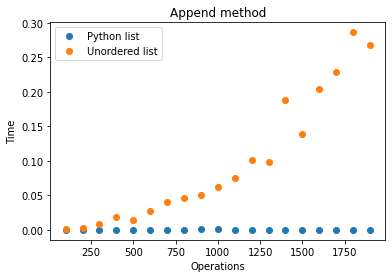

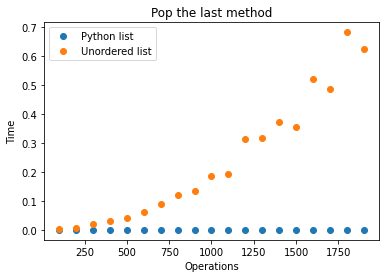

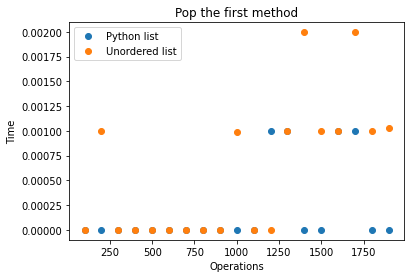

In [74]:
a = []
b = UnorderedList()
rng = range(100, 2000, 100)

app_a = []
pop_a = []
pop0_a = []
app_b = []
pop_b = []
pop0_b = []

for N in rng:
    app_a.append(time_check_app(a, N))
    app_b.append(time_check_app(b, N))
    pop_a.append(time_check_pop(a, N))
    pop_b.append(time_check_pop(b, N))
    time_check_app(a, N)
    time_check_app(b, N)
    pop0_a.append(time_check_pop0(a, N))
    pop0_b.append(time_check_pop0(b, N))

plt.plot(rng, app_a, 'o')
plt.plot(rng, app_b, 'o')
plt.xlabel("Operations")
plt.ylabel("Time")
plt.title("Append method")
plt.gca().legend(('Python list', 'Unordered list'))
plt.show()

plt.plot(rng, pop_a, 'o')
plt.plot(rng, pop_b, 'o')
plt.xlabel("Operations")
plt.ylabel("Time")
plt.title("Pop the last method")
plt.gca().legend(('Python list', 'Unordered list'))
plt.show()

plt.plot(rng, pop0_a, 'o')
plt.plot(rng, pop0_b, 'o')
plt.xlabel("Operations")
plt.ylabel("Time")
plt.title("Pop the first method")
plt.gca().legend(('Python list', 'Unordered list'))
plt.show()


Wyraźnie widać, że w przypadku `pop` i `append` *lista pythonowa* sprawdza się znacznie lepiej. To ją zatem powinniśmy preferować w użytku.

Dodatkowo widać, że `pop(0)` działa podobnie dla obu list, stąd można się domyślać, że *pythonowa lista* nie jest np. jednokierunkowa z przeciwnym zwrotem, bo wtedy otrzymalibyśmy odwrotny wykres do drugiego, a same pierwszy i drugi wykres mogłyby teoretycznie być w takiej formie jak to jest przedstawione wyżej.